In [2]:
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install scipy
!pip install imblearn
!pip install matplotlib
!pip install seaborn
!pip install graphviz

In [2]:
# load libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import graphviz
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn import preprocessing

warnings.filterwarnings('ignore')

In [ ]:
#load data

In [157]:
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [ ]:
#explore data 

In [5]:
pharma_data.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')

In [6]:
test_data.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond'],
      dtype='object')

In [7]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [8]:
test_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
pharma_data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [9]:
test_data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond
count,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.0,9303.000000
mean,16392.542943,26.680426,6226.311620,33.249059,23.429321,0.893260,0.142320,0.183167,0.087284,0.399441,0.052886,0.0,1.758358
std,9531.750578,15.097842,3634.312461,19.477920,3.769305,0.308799,0.349396,0.386824,0.282265,0.489810,0.223818,0.0,0.771230
min,1.000000,1.000000,3.000000,0.000000,17.000695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,8133.000000,14.000000,3073.500000,17.000000,20.166849,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
50%,16281.000000,27.000000,6246.000000,33.000000,23.392495,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000
75%,24588.500000,40.000000,9424.000000,50.000000,26.726929,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,2.000000
max,32975.000000,52.000000,12500.000000,66.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,5.000000


In [10]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9303 non-null   int64  
 1   Diagnosed_Condition        9303 non-null   int64  
 2   Patient_ID                 9303 non-null   int64  
 3   Treated_with_drugs         9303 non-null   object 
 4   Patient_Age                9303 non-null   int64  
 5   Patient_Body_Mass_Index    9303 non-null   float64
 6   Patient_Smoker             9303 non-null   object 
 7   Patient_Rural_Urban        9303 non-null   object 
 8   Patient_mental_condition   9303 non-null   object 
 9   A                          9303 non-null   float64
 10  B                          9303 non-null   float64
 11  C                          9303 non-null   float64
 12  D                          9303 non-null   float64
 13  E                          9303 non-null   float

In [11]:
dt_data = pharma_data


In [12]:
dtest_data = test_data

In [14]:
dt_data.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')

In [15]:
#data preprocessing

In [158]:
dt_data.rename(columns={"ID_Patient_Care_Situation":"patient_care", "Diagnosed_Condition":"diagnosis", \
                            "Treated_with_drugs":"drugs", "Patient_Age":"age", "Patient_Body_Mass_Index":"bmi", "Patient_Smoker":"smoker", "Patient_Rural_Urban":"residence", "Patient_mental_condition":"mental_condition", "Number_of_prev_cond":"prev_cond",'Survived_1_year':"survived"}, inplace=True)


In [159]:
dtest_data.rename(columns={"ID_Patient_Care_Situation":"patient_care", "Diagnosed_Condition":"diagnosis", \
                            "Treated_with_drugs":"drugs", "Patient_Age":"age", "Patient_Body_Mass_Index":"bmi", "Patient_Smoker":"smoker", "Patient_Rural_Urban":"residence", "Patient_mental_condition":"mental_condition", "Number_of_prev_cond":"prev_cond"}, inplace=True)


In [161]:
columns = list(dt_data.columns).remove('survived')
dt_data.pivot_table(columns, ['survived'], aggfunc=np.median)

,A,B,C,D,E,F,Patient_ID,Z,age,bmi,diagnosis,patient_care,prev_cond
survived,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,6240,0.0,36,24.573334,26,16687,2.0
1,1.0,0.0,0.0,0.0,0.0,0.0,6242,0.0,31,22.961101,26,16527,2.0


In [162]:
included_data = dt_data.drop('Patient_ID', axis=1)
my_data = dt_data['Patient_ID']

In [163]:
testing_data = dtest_data.drop('Patient_ID', axis=1)
myTest_data = dt_data['Patient_ID']

In [164]:
testing_data.columns

Index(['patient_care', 'diagnosis', 'drugs', 'age', 'bmi', 'smoker',
       'residence', 'mental_condition', 'A', 'B', 'C', 'D', 'E', 'F', 'Z',
       'prev_cond'],
      dtype='object')

In [165]:
included_data.columns

Index(['patient_care', 'diagnosis', 'drugs', 'age', 'bmi', 'smoker',
       'residence', 'mental_condition', 'A', 'B', 'C', 'D', 'E', 'F', 'Z',
       'prev_cond', 'survived'],
      dtype='object')

<AxesSubplot:>

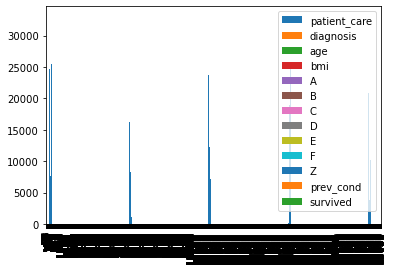

In [25]:
included_data.plot.bar()

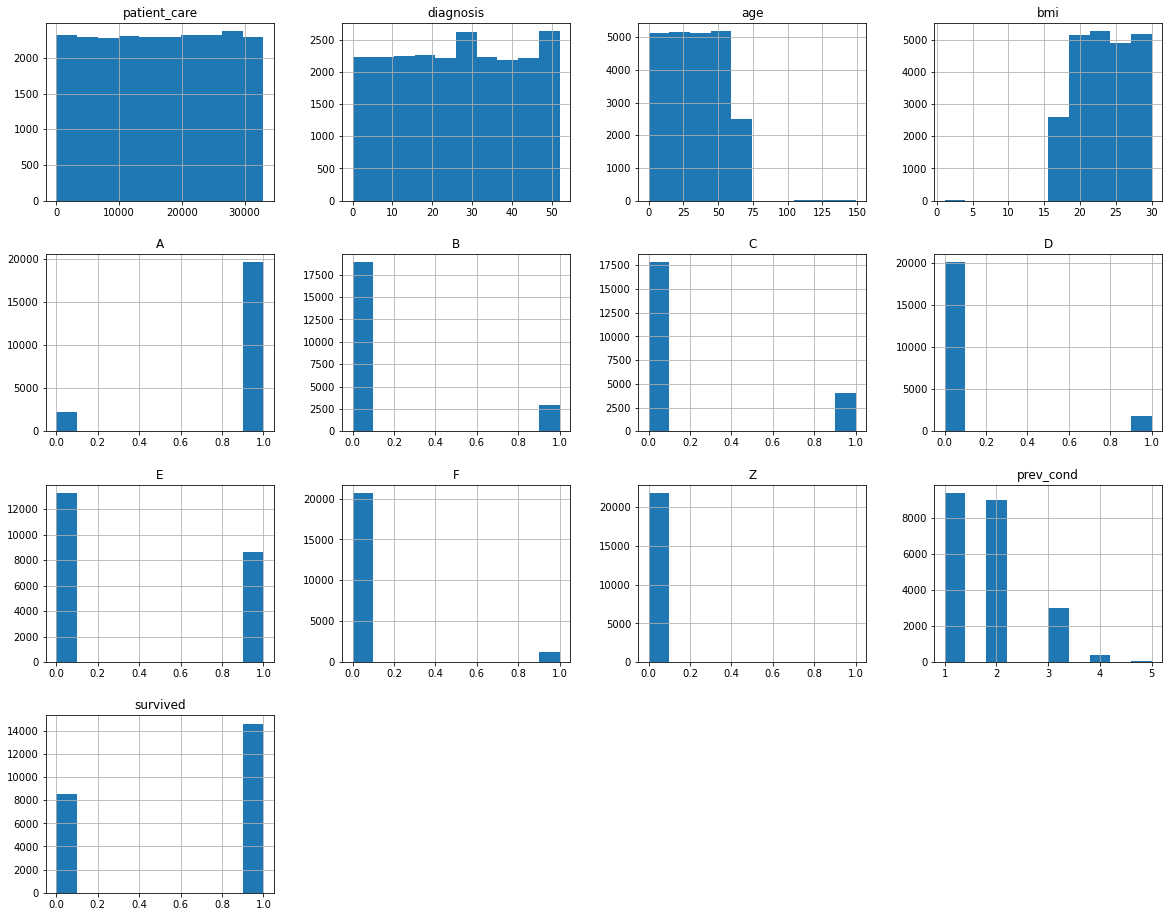

In [27]:
included_data.hist(bins=10, figsize=(20,16))
plt.show()

In [28]:
included_data.head()


,patient_care,diagnosis,drugs,age,bmi,smoker,residence,mental_condition,A,B,C,D,E,F,Z,prev_cond,survived
0,22374,8,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


<AxesSubplot:>

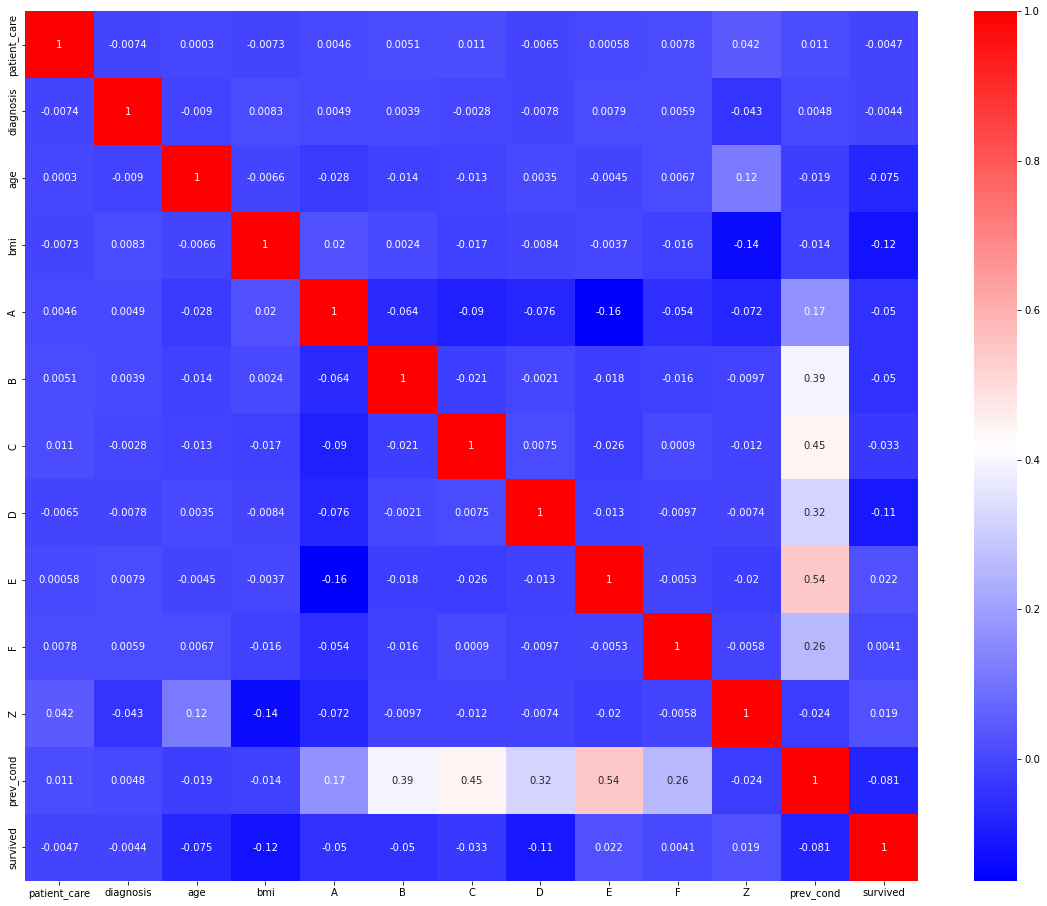

In [26]:
plt.figure(figsize=(20, 16))
sns.heatmap(included_data.corr(), cmap='bwr', annot=True)

<AxesSubplot:xlabel='survived', ylabel='count'>

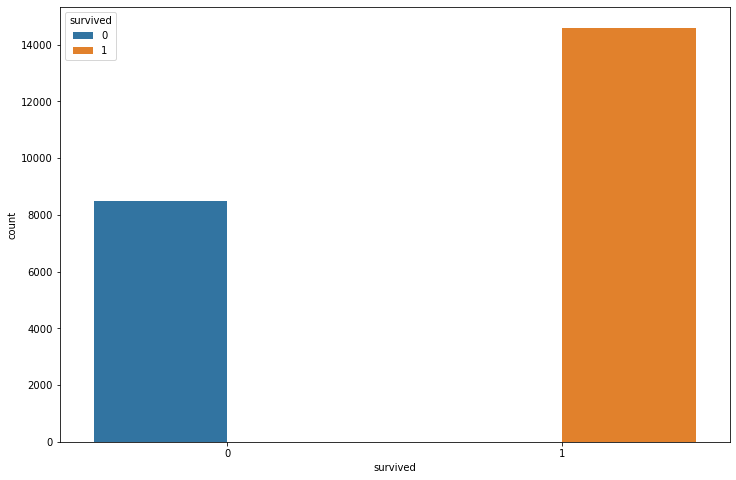

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(included_data.survived, hue=included_data.survived)

<AxesSubplot:xlabel='survived', ylabel='count'>

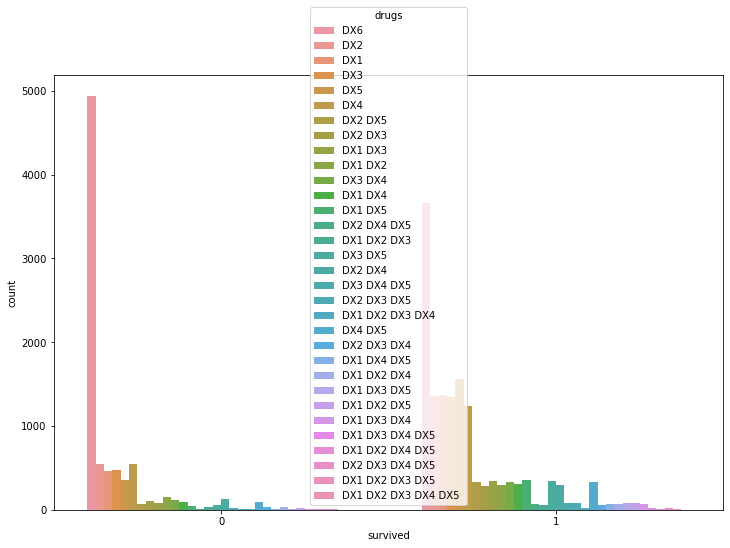

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(included_data.survived, hue=included_data.drugs)

<AxesSubplot:xlabel='survived', ylabel='count'>

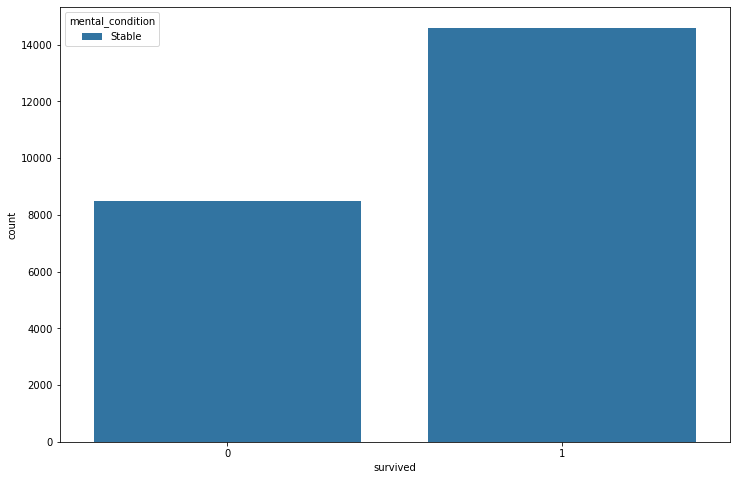

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(included_data.survived, hue=included_data.mental_condition)

<AxesSubplot:xlabel='survived', ylabel='count'>

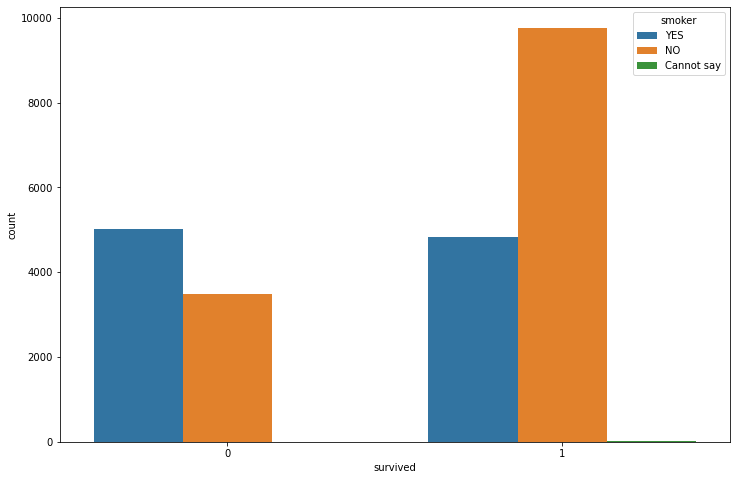

In [30]:
plt.figure(figsize=(12,8))
sns.countplot(included_data.survived, hue=included_data.smoker)

<AxesSubplot:xlabel='survived', ylabel='count'>

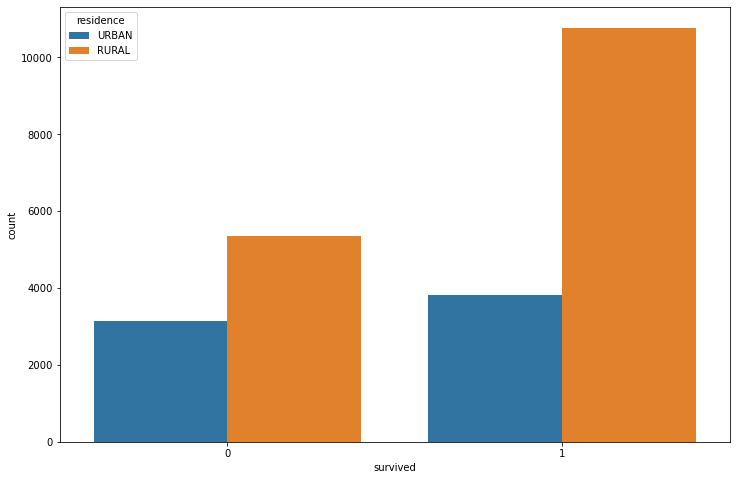

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(included_data.survived, hue=included_data.residence)

In [166]:
def is_unique(s):
    a = s.to_numpy() 
    return (a[0] == a).all()

is_unique(included_data['mental_condition'])

True

In [167]:
is_unique(testing_data['mental_condition'])

True

In [168]:
included_data.drop('mental_condition', axis=1, inplace= True)
testing_data.drop('mental_condition', axis=1, inplace=True)

In [169]:
included_data.head()

,patient_care,diagnosis,drugs,age,bmi,smoker,residence,A,B,C,D,E,F,Z,prev_cond,survived
0,22374,8,DX6,56,18.479385,YES,URBAN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,DX2,36,22.945566,YES,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,DX6,48,27.510027,YES,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,DX1,5,19.130976,NO,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,NaN,128,1.348400,Cannot say,RURAL,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [170]:
testing_data.head()

,patient_care,diagnosis,drugs,age,bmi,smoker,residence,A,B,C,D,E,F,Z,prev_cond
0,19150,40,DX3,16,29.443894,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,DX6,24,26.836321,NO,URBAN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,DX4 DX5,63,25.523280,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,DX6,42,27.171155,NO,URBAN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,DX3,50,25.556192,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


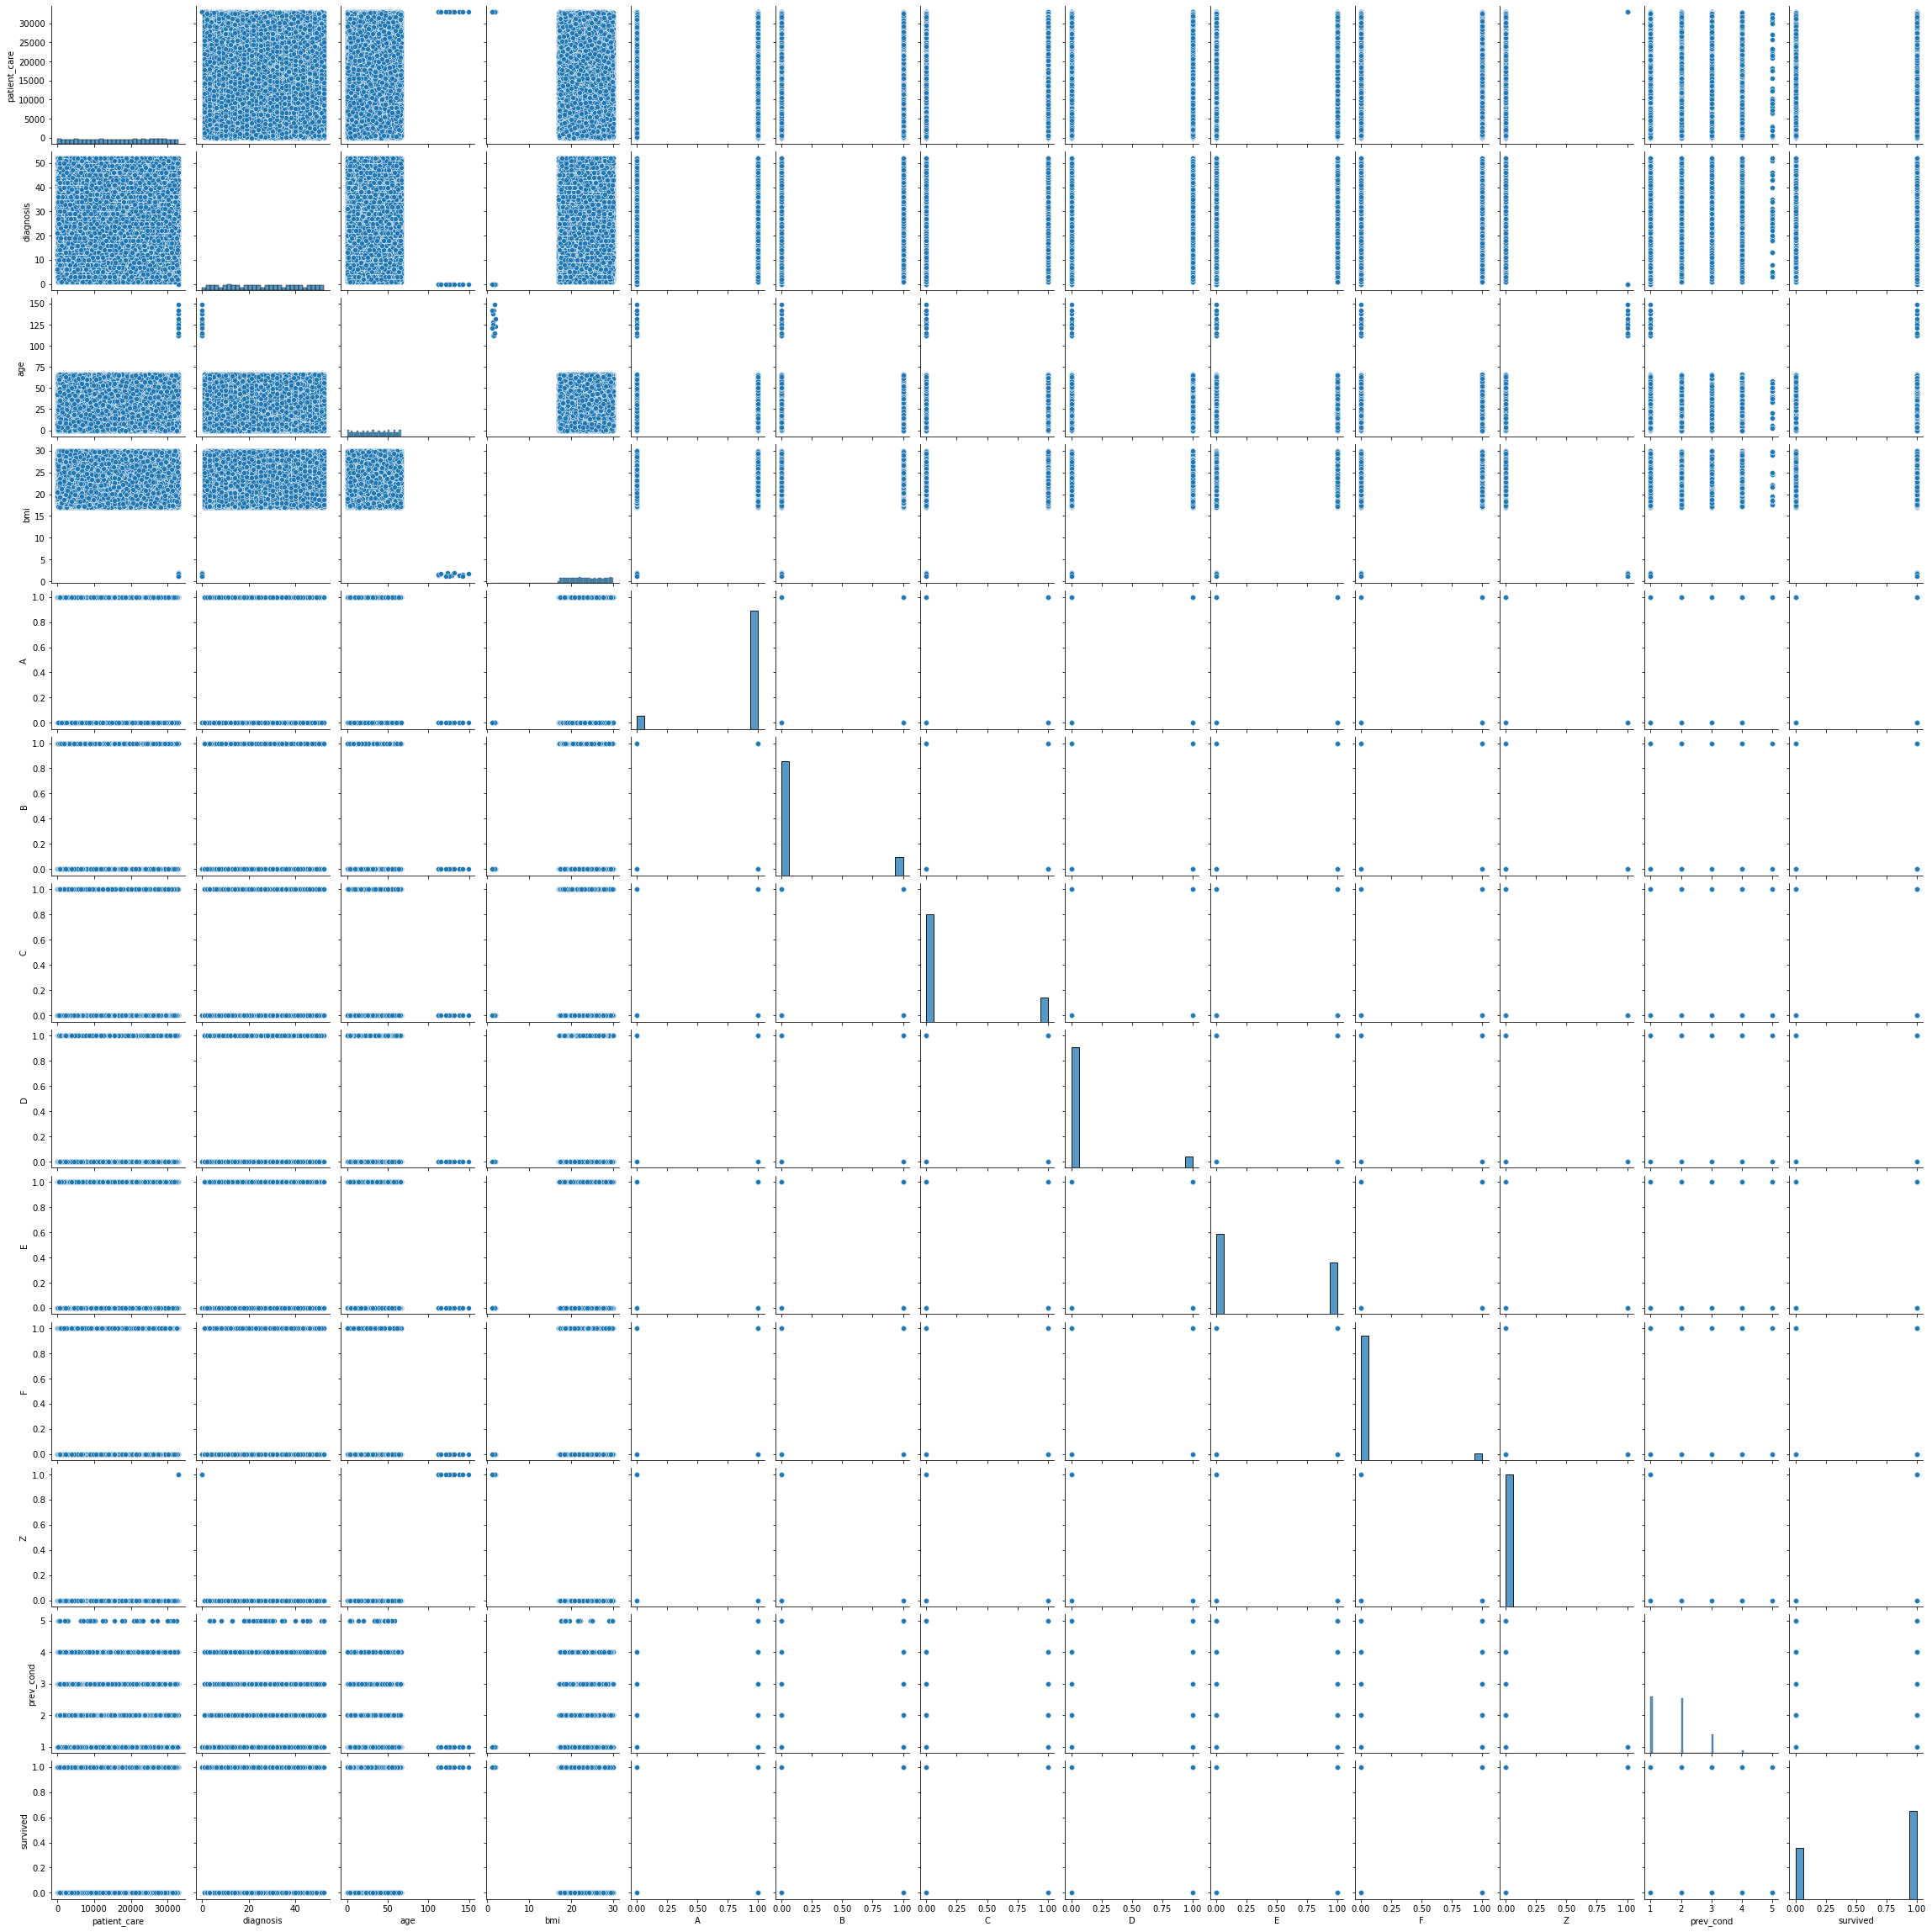

In [34]:
sns.pairplot(included_data)

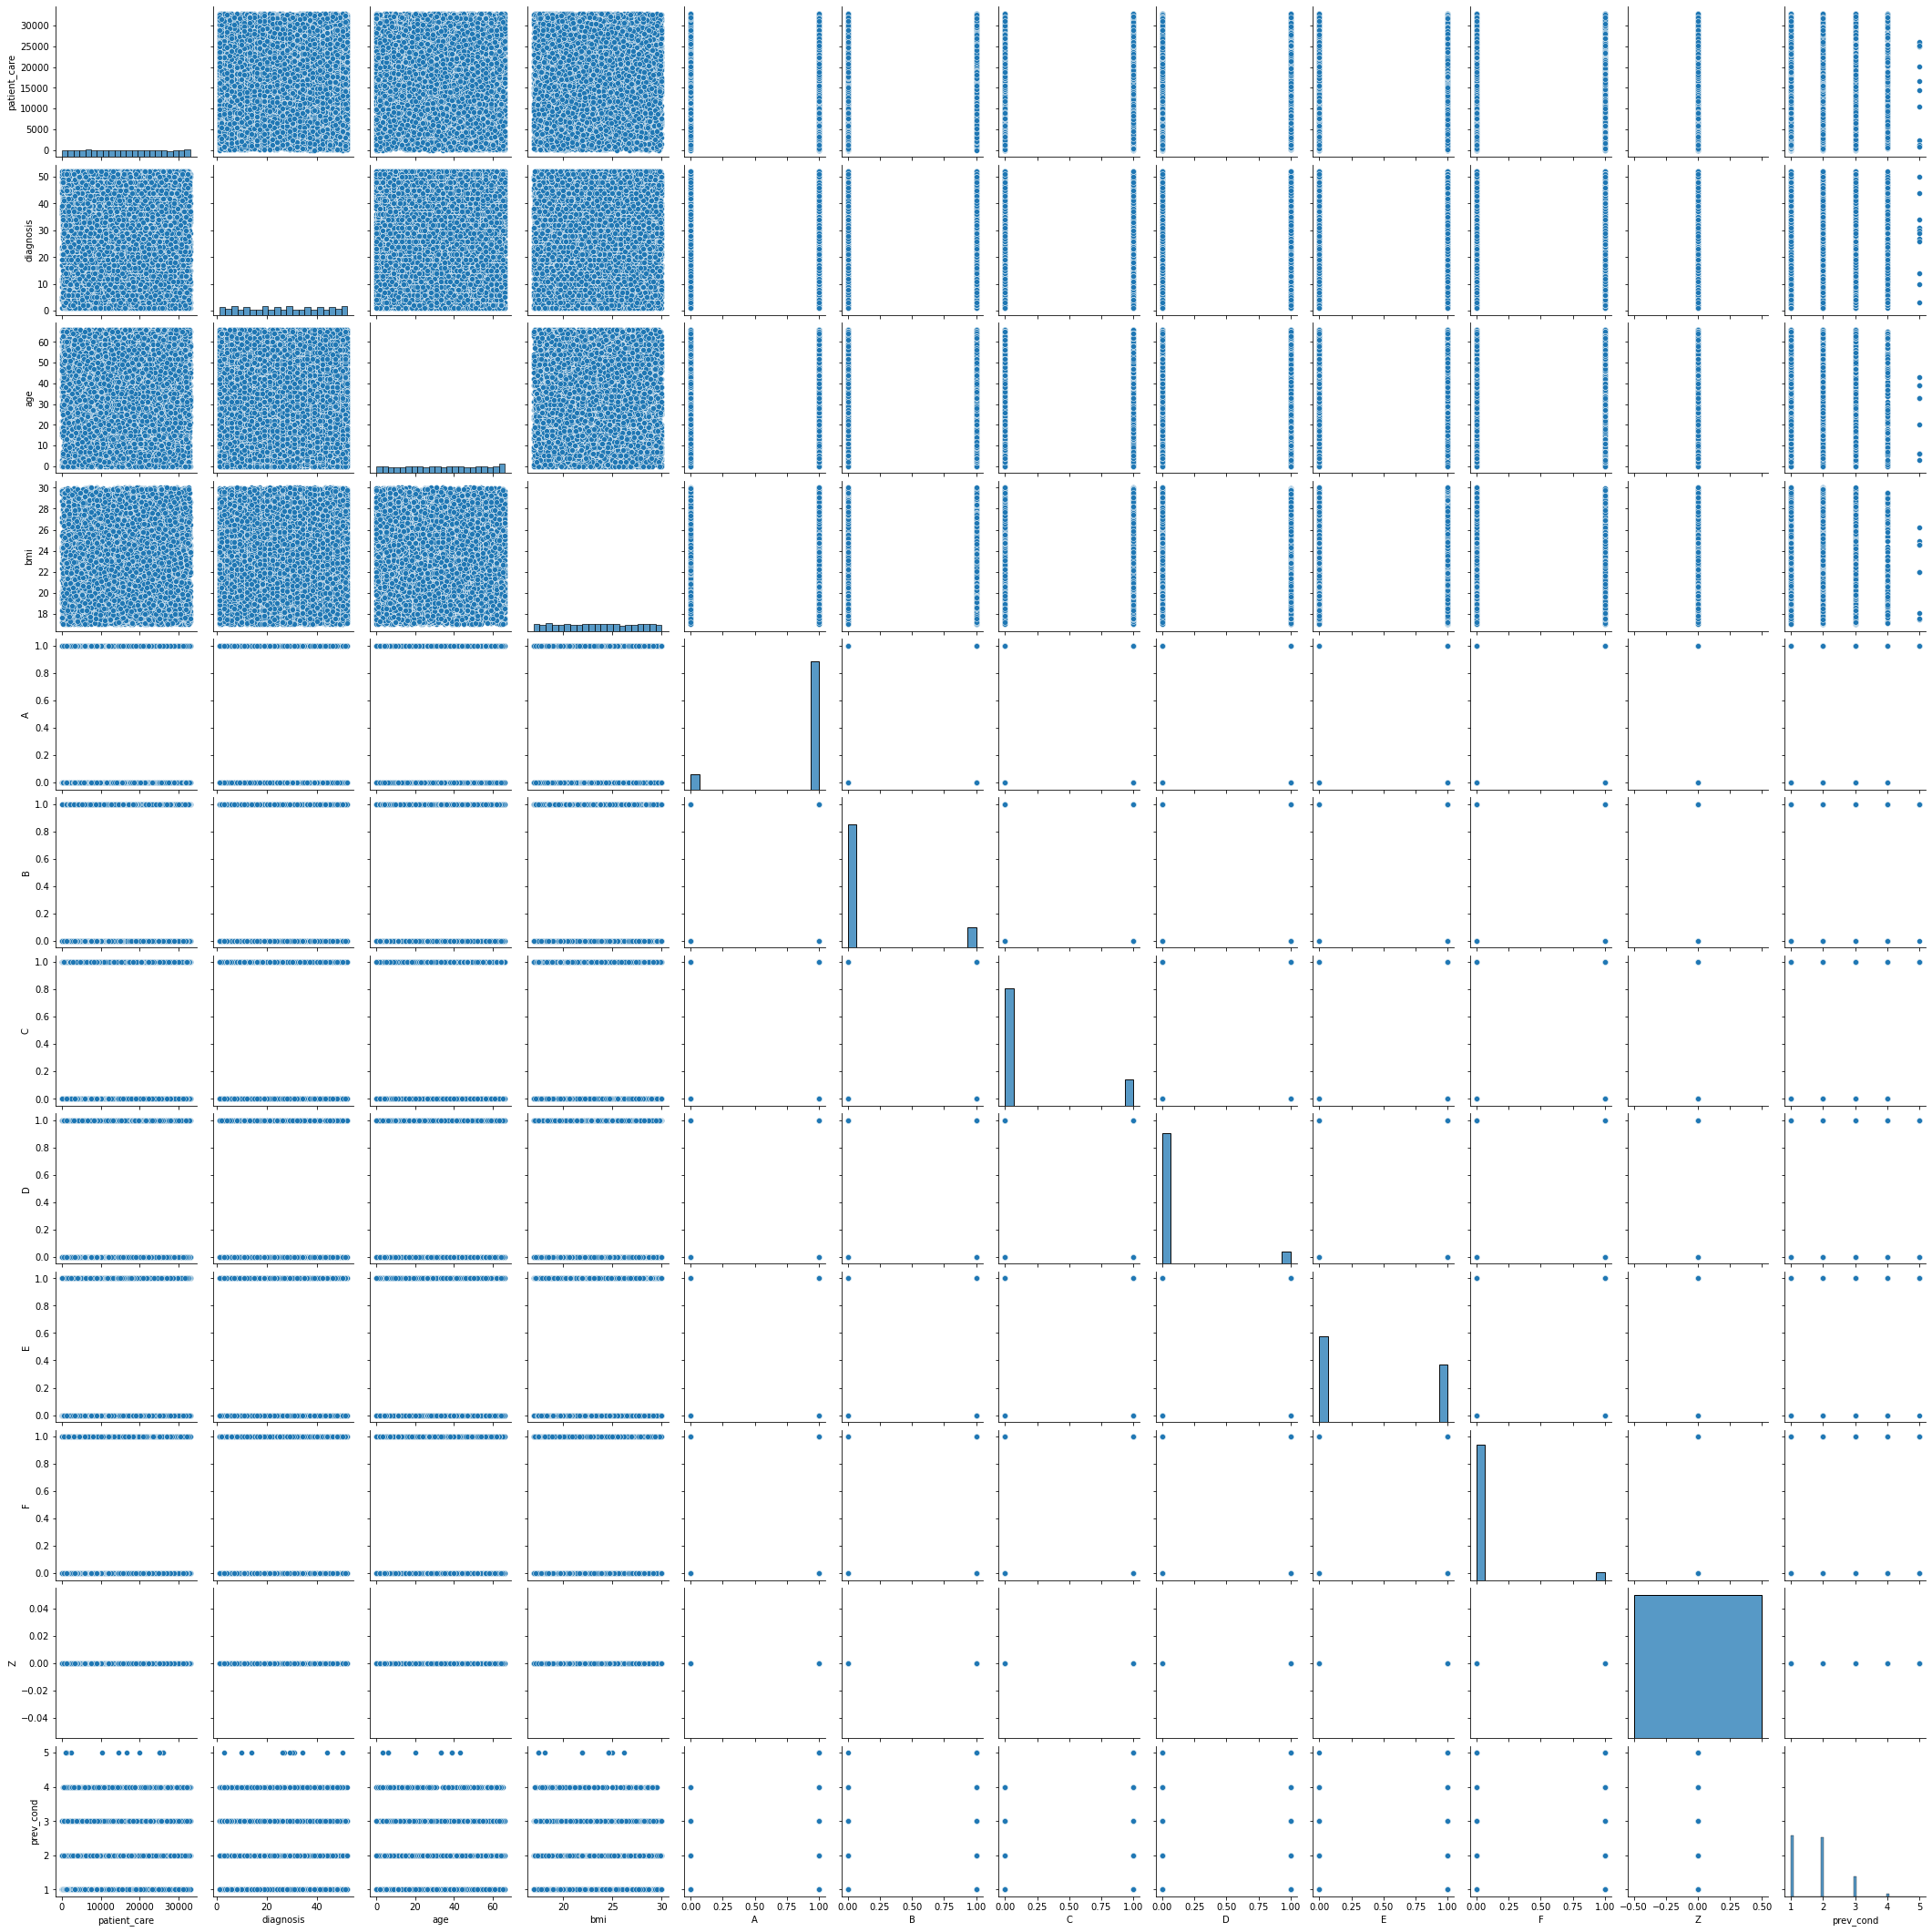

In [38]:
sns.pairplot(testing_data)

In [171]:
#imputation
included_data_single= included_data
cols= included_data_single.columns
num_cols = included_data_single.select_dtypes(include=np.number).columns
included_data_single.loc[:,num_cols]=included_data_single.loc[:,num_cols].fillna(included_data_single.loc[:,num_cols].median())
print(num_cols)
print(included_data_single.loc[:,num_cols].median())

Index(['patient_care', 'diagnosis', 'age', 'bmi', 'A', 'B', 'C', 'D', 'E', 'F',
       'Z', 'prev_cond', 'survived'],
      dtype='object')
patient_care    16597.000000
diagnosis          26.000000
age                33.000000
bmi                23.386199
A                   1.000000
B                   0.000000
C                   0.000000
D                   0.000000
E                   0.000000
F                   0.000000
Z                   0.000000
prev_cond           2.000000
survived            1.000000
dtype: float64


In [172]:
# categorical imputation with mode
cat_cols= list(set(cols) - set(num_cols))
included_data_single.loc[:,cat_cols] = included_data_single.loc[:,cat_cols].fillna(included_data.loc[:,cat_cols].mode().iloc[0])
train_cols = included_data_single.columns
print(cat_cols)
print(included_data_single.loc[:,cat_cols].mode().iloc[0])

['smoker', 'residence', 'drugs']
smoker          NO
residence    RURAL
drugs          DX6
Name: 0, dtype: object


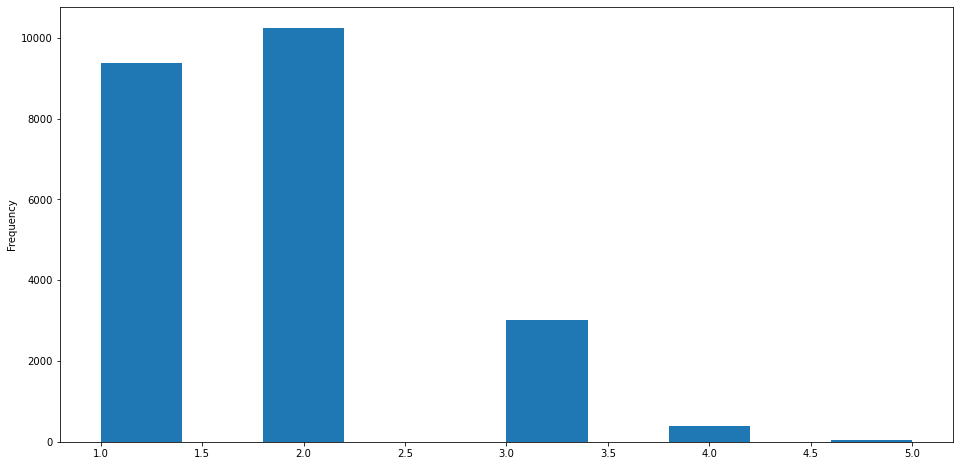

In [173]:
#after filling
included_data_single['prev_cond'].plot.hist(figsize=(16,8));

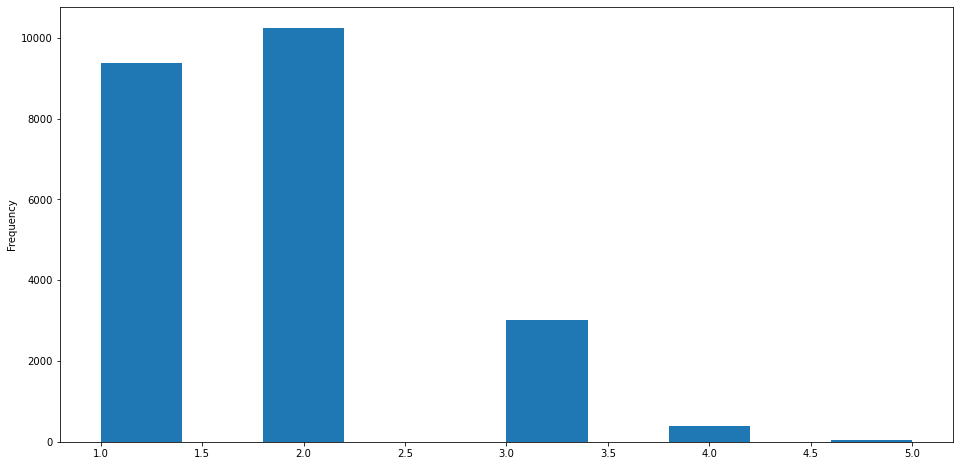

In [174]:
#before filling
included_data['prev_cond'].plot.hist(figsize=(16,8));

In [175]:
included_data_single.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_care  23097 non-null  int64  
 1   diagnosis     23097 non-null  int64  
 2   drugs         23097 non-null  object 
 3   age           23097 non-null  int64  
 4   bmi           23097 non-null  float64
 5   smoker        23097 non-null  object 
 6   residence     23097 non-null  object 
 7   A             23097 non-null  float64
 8   B             23097 non-null  float64
 9   C             23097 non-null  float64
 10  D             23097 non-null  float64
 11  E             23097 non-null  float64
 12  F             23097 non-null  float64
 13  Z             23097 non-null  float64
 14  prev_cond     23097 non-null  float64
 15  survived      23097 non-null  int64  
dtypes: float64(9), int64(4), object(3)
memory usage: 2.8+ MB


In [177]:
y = included_data_single['survived']
x = included_data_single.loc[:,included_data_single.columns != 'survived']

In [178]:
x.head()

,patient_care,diagnosis,drugs,age,bmi,smoker,residence,A,B,C,D,E,F,Z,prev_cond
0,22374,8,DX6,56,18.479385,YES,URBAN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,18164,5,DX2,36,22.945566,YES,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,6283,23,DX6,48,27.510027,YES,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5339,51,DX1,5,19.130976,NO,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33012,0,DX6,128,1.348400,Cannot say,RURAL,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [208]:
dtest_data.columns

Index(['patient_care', 'diagnosis', 'Patient_ID', 'drugs', 'age', 'bmi',
       'smoker', 'residence', 'mental_condition', 'A', 'B', 'C', 'D', 'E', 'F',
       'Z', 'prev_cond'],
      dtype='object')

In [209]:
dtest_data.head()

,patient_care,diagnosis,Patient_ID,drugs,age,bmi,smoker,residence,mental_condition,A,B,C,D,E,F,Z,prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [210]:
dtest_data.isnull().sum()

patient_care        0
diagnosis           0
Patient_ID          0
drugs               0
age                 0
bmi                 0
smoker              0
residence           0
mental_condition    0
A                   0
B                   0
C                   0
D                   0
E                   0
F                   0
Z                   0
prev_cond           0
dtype: int64

In [211]:
dtest_data.head()

,patient_care,diagnosis,Patient_ID,drugs,age,bmi,smoker,residence,mental_condition,A,B,C,D,E,F,Z,prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [56]:
# build model

In [228]:
from sklearn.ensemble import RandomForestClassifier
clf_1 = RandomForestClassifier(min_samples_leaf=2, random_state=9)

In [229]:
testable_data_single.columns

Index(['patient_care', 'diagnosis', 'drugs', 'age', 'bmi', 'smoker',
       'residence', 'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'prev_cond'],
      dtype='object')

In [219]:
testable_data_single.drop('Patient_ID', axis=1, inplace=True)
testable_data_single.drop('mental_condition', axis=1, inplace=True)

In [220]:
testable_data_single.columns

Index(['patient_care', 'diagnosis', 'drugs', 'age', 'bmi', 'smoker',
       'residence', 'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'prev_cond'],
      dtype='object')

In [222]:
x.head()

,patient_care,diagnosis,drugs,age,bmi,smoker,residence,A,B,C,D,E,F,Z,prev_cond
0,22374,8,DX6,56,18.479385,YES,URBAN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,18164,5,DX2,36,22.945566,YES,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,6283,23,DX6,48,27.510027,YES,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5339,51,DX1,5,19.130976,NO,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33012,0,DX6,128,1.348400,Cannot say,RURAL,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [223]:
testable_data_single.head()

,patient_care,diagnosis,drugs,age,bmi,smoker,residence,A,B,C,D,E,F,Z,prev_cond
0,19150,40,DX3,16,29.443894,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,DX6,24,26.836321,NO,URBAN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,DX4 DX5,63,25.523280,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,DX6,42,27.171155,NO,URBAN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,DX3,50,25.556192,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [235]:
testable_data_single.drop('smoker', axis=1, inplace=True)
x.drop('smoker', axis=1, inplace=True)

In [237]:
# one hot encoder
included_data_dummy = pd.get_dummies(x, prefix_sep='_', drop_first=True)

In [238]:
mainTesting_data_dummy = pd.get_dummies(testable_data_single, prefix_sep='_', drop_first=True)

In [241]:
xTrain, xTest, yTrain, yTest = train_test_split(included_data_dummy, y, test_size = 0.3, random_state = 123)

In [240]:
xTrain.head()

,patient_care,diagnosis,age,bmi,A,B,C,D,E,F,...,drugs_DX2 DX5,drugs_DX3,drugs_DX3 DX4,drugs_DX3 DX4 DX5,drugs_DX3 DX5,drugs_DX4,drugs_DX4 DX5,drugs_DX5,drugs_DX6,residence_URBAN
2375,3288,40,60,25.697914,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
3582,5754,33,30,17.498276,1.0,0.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
2807,25428,8,61,20.420621,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9287,32945,35,54,19.384345,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9112,22462,21,58,26.820454,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [242]:
mainTesting_data_dummy.head()

,patient_care,diagnosis,age,bmi,A,B,C,D,E,F,...,drugs_DX2 DX5,drugs_DX3,drugs_DX3 DX4,drugs_DX3 DX4 DX5,drugs_DX3 DX5,drugs_DX4,drugs_DX4 DX5,drugs_DX5,drugs_DX6,residence_URBAN
0,19150,40,16,29.443894,1.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,23216,52,24,26.836321,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
2,11890,50,63,25.523280,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,7149,32,42,27.171155,1.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,1
4,22845,20,50,25.556192,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0


In [243]:
clf_1.fit(xTrain,yTrain)

RandomForestClassifier(min_samples_leaf=2, random_state=9)

clf_1.fit(xTrain, yTrain)

In [244]:
clf_2 = RandomForestClassifier(max_depth=8, random_state=9)
clf_2.fit(xTrain, yTrain)

RandomForestClassifier(max_depth=8, random_state=9)

In [245]:
y_clf_1 = clf_1.predict(xTest)

y_clf_2 = clf_2.predict(xTest)

In [246]:
y_clf_3 = clf_1.predict(mainTesting_data_dummy)

In [247]:
y_clf_4 = clf_2.predict(mainTesting_data_dummy)

In [248]:
y_clf_3

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [249]:
y_clf_4

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [250]:
pd.DataFrame(y_clf_3, columns=['prediction']).to_csv('min_sample2_prediction.csv',index=False)
pd.DataFrame(y_clf_4,  columns=['prediction']).to_csv('max_depth8_prediction.csv', index=False)

In [ ]:
#evaluate model

In [251]:
# accuracy
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
#test model
accuracy_clf_1 = accuracy_score(yTest, y_clf_1)
auc_roc1 = roc_auc_score(yTest, y_clf_1)
print("Accuracy score of the model is: {}".format(accuracy_clf_1))
print("roc_auc_score of the model1 is: {}".format(auc_roc1))

Accuracy score of the model is: 0.7858585858585858
roc_auc_score of the model1 is: 0.7561009492439503


In [252]:
accuracy_clf_2 = accuracy_score(yTest, y_clf_2)
auc_roc2 = roc_auc_score(yTest, y_clf_2)
print("Accuracy score of the model is: {}".format(accuracy_clf_2))
print("roc_auc_score of the model2 is: {}".format(auc_roc2))

Accuracy score of the model is: 0.7522366522366523
roc_auc_score of the model2 is: 0.6868190456156875


In [253]:
confusion_matrix(yTest, y_clf_1)

array([[1636,  900],
       [ 584, 3810]], dtype=int64)

In [254]:
confusion_matrix(yTest, y_clf_2)

array([[1123, 1413],
       [ 304, 4090]], dtype=int64)

<AxesSubplot:>

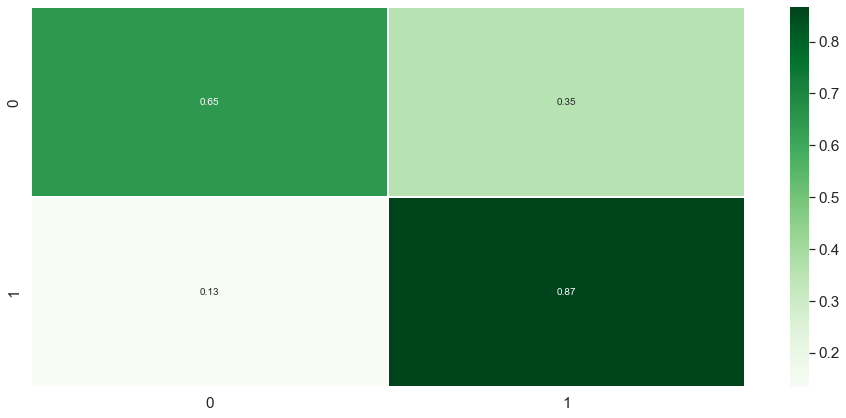

In [255]:
matrix = confusion_matrix(yTest, y_clf_1)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
